<a href="https://colab.research.google.com/github/mohamedyosef101/learning_area/blob/area/TensorFlow/01-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is **Regression Analysis**
A statistical technique used to investigate the relationship between a dependent variable (target/label) and one or more independent variables (features).


## Typical architecture of a regression neural network.
There are many different ways but this is a generic setup.



| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [1]:
# import the library
import tensorflow as tf
import datetime as dt
print(f"Notebook last run: {dt.datetime.now()}")

Notebook last run: 2024-01-02 19:11:24.019511


<Axes: >

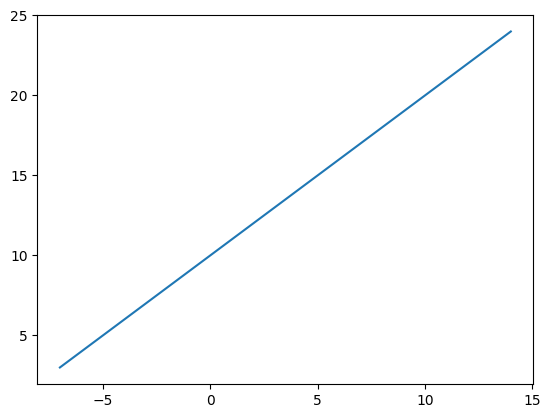

In [3]:
# Let's play with some linear data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# viz
sns.lineplot(x=X, y=y)

In [4]:
tf.__version__

'2.15.0'

In [6]:
# steps in modelling with tensorflow

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 749ms/step - loss: 18.1465 - mae: 18.1465
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 17.8653 - mae: 17.8653
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 17.5840 - mae: 17.5840
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 17.3028 - mae: 17.3028
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 17.0215 - mae: 17.0215


In [7]:
# test the model
model.predict([17.0])

# the answer should be close to 27.0

1/1 [==============================] - 0s 177ms/step


array([[-12.974434]], dtype=float32)

# Improving the model
common ways:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [8]:
# model 102
tf.random.set_seed(7) # 42 is famous fo good luck but I love 7

# evaluate the model
model102 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the new model
model102.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 62ms/step - loss: 16.7403 - mae: 16.7403
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 16.4590 - mae: 16.4590
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 16.1778 - mae: 16.1778
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 15.8965 - mae: 15.8965
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.6153 - mae: 15.6153
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 15.3340 - mae: 15.3340
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.0528 - mae: 15.0528
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.8027 - mae: 14.8027
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6702 - mae: 14.6702
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5377 - mae: 14.5377
Epoch 11/100
1/1 [==============================]

In [9]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 49ms/step


array([[29.27556]], dtype=float32)